# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 563


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        city_weather = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | riachao das neves
Processing Record 3 of Set 1 | longyearbyen
Processing Record 4 of Set 1 | taiohae
City not found. Skipping...
Processing Record 5 of Set 1 | flying fish cove
Processing Record 6 of Set 1 | puerto natales
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | orsk
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | pacific grove
Processing Record 11 of Set 1 | badger
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | rosice
Processing Record 15 of Set 1 | adel
Processing Record 16 of Set 1 | manggar
Processing Record 17 of Set 1 | laguna
Processing Record 18 of Set 1 | kidal
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | anadyr
Processing Record 21 of Set 1 | vorgashor
Processing Record 22 of Set 1 | port saint

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          534
Lat           534
Lng           534
Max Temp      534
Humidity      534
Cloudiness    534
Wind Speed    534
Country       534
Date          534
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,7.14,84,54,5.28,GS,1706589132
1,riachao das neves,-11.7461,-44.9100,20.55,92,28,0.51,BR,1706589133
2,longyearbyen,78.2186,15.6401,-2.09,74,75,5.14,SJ,1706589133
3,flying fish cove,-10.4217,105.6791,26.82,94,100,2.06,CX,1706589133
4,puerto natales,-51.7236,-72.4875,8.94,95,100,0.97,CL,1706589133


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,7.14,84,54,5.28,GS,1706589132
1,riachao das neves,-11.7461,-44.9100,20.55,92,28,0.51,BR,1706589133
2,longyearbyen,78.2186,15.6401,-2.09,74,75,5.14,SJ,1706589133
3,flying fish cove,-10.4217,105.6791,26.82,94,100,2.06,CX,1706589133
4,puerto natales,-51.7236,-72.4875,8.94,95,100,0.97,CL,1706589133


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

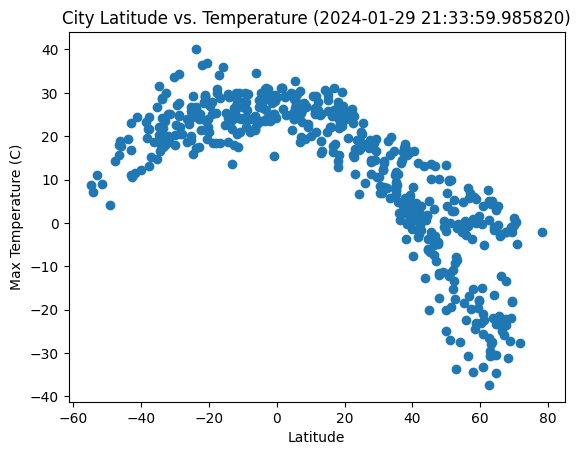

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
from datetime import datetime
date = datetime.now()
plt.title(f"City Latitude vs. Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

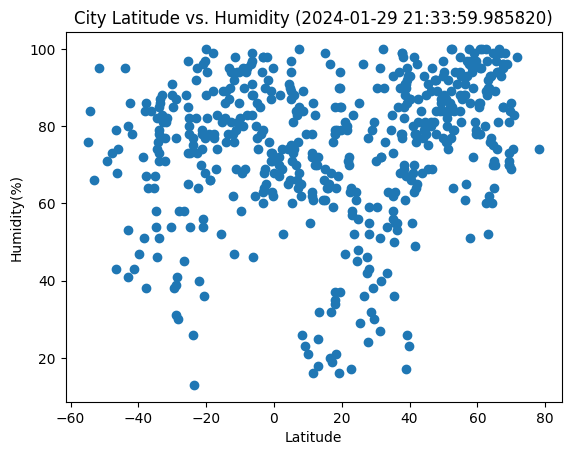

In [9]:
# Build scatter plot for latitude vs. Humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

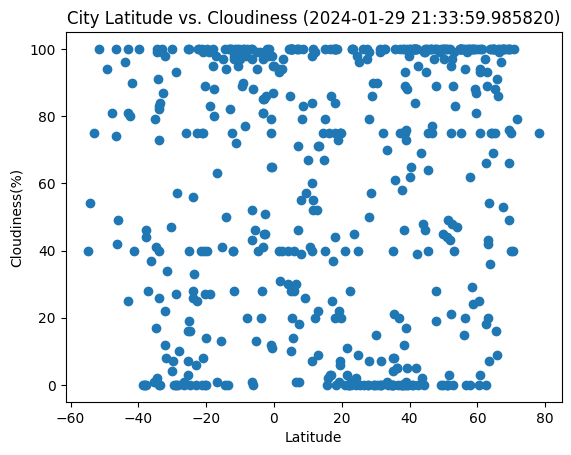

In [10]:
# Build scatter plot for latitude vs. Cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

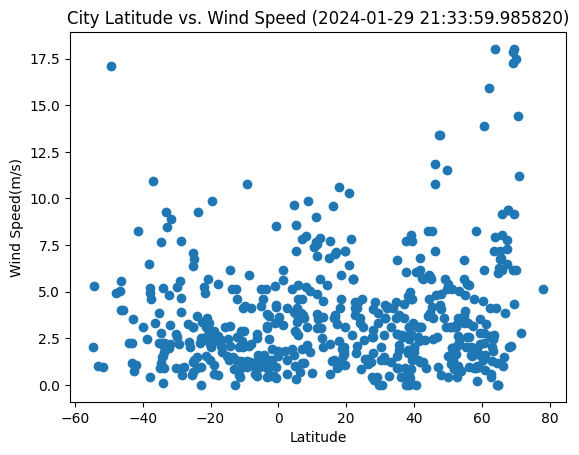

In [11]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,longyearbyen,78.2186,15.6401,-2.09,74,75,5.14,SJ,1706589133
6,orsk,51.2049,58.5668,-11.50,92,0,2.00,RU,1706589134
7,jamestown,42.0970,-79.2353,-0.55,96,100,3.09,US,1706588873
8,pacific grove,36.6177,-121.9166,13.82,85,0,2.57,US,1706588945
9,badger,64.8000,-147.5333,-23.26,71,100,0.00,US,1706589135


In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df['Lat'] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,7.14,84,54,5.28,GS,1706589132
1,riachao das neves,-11.7461,-44.9100,20.55,92,28,0.51,BR,1706589133
3,flying fish cove,-10.4217,105.6791,26.82,94,100,2.06,CX,1706589133
4,puerto natales,-51.7236,-72.4875,8.94,95,100,0.97,CL,1706589133
5,adamstown,-25.0660,-130.1015,24.53,80,100,6.39,PN,1706589134


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8517414457739939


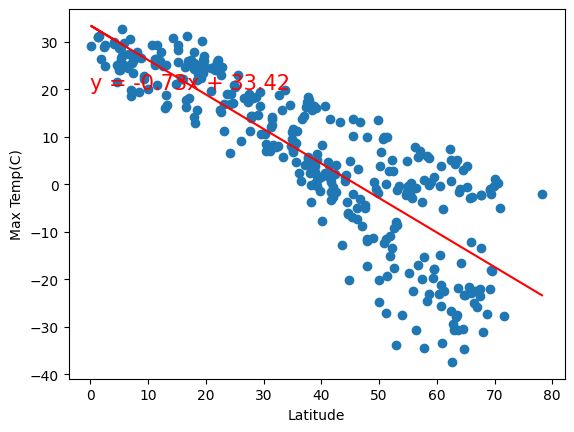

In [22]:
# Define a function to create Linear Regression plots
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
# Linear regression on Northern Hemisphere
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "-r")
plt.xlabel("Latitude")
plt.ylabel("Max Temp(C)")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
print(f'The r-value is {rvalue}')
plt.show()

The r-value is 0.5330937420948592


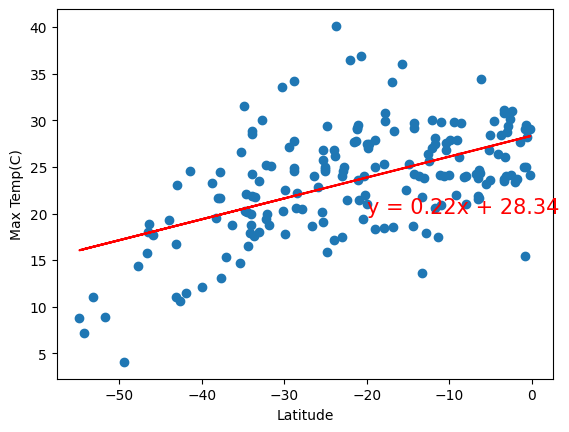

In [26]:
# Define a function to create Linear Regression plots
x_values1 = southern_hemi_df["Lat"]
y_values1 = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values1, y_values1)
regress_values1 = x_values1 * slope + intercept
line_eq1 = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
# Linear regression on Southern Hemisphere
plt.scatter(x_values1,y_values1)
plt.plot(x_values1,regress_values1, "-r")
plt.xlabel("Latitude")
plt.ylabel("Max Temp(C)")
plt.annotate(line_eq1,(-20,20),fontsize=15,color="red")
print(f'The r-value is {rvalue}')
plt.show()

**Discussion about the linear relationship:
---
 - There is a strong negative correlation between latitude and maximum temperature on the Northern Hemisphere.
 - There is a positive correlation between latitude and maximum temperature on the Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.39117448926995474


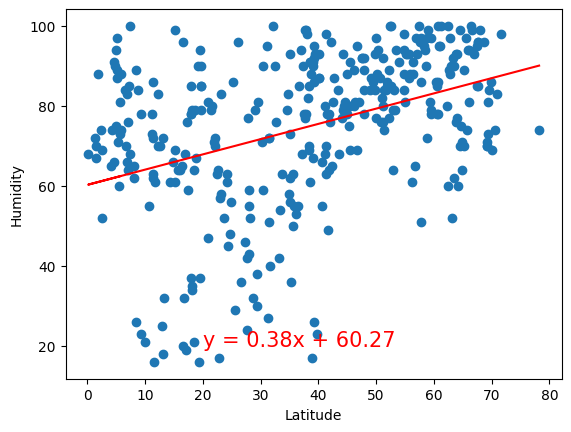

In [28]:
# Define a function to create Linear Regression plots
x_values2 = northern_hemi_df["Lat"]
y_values2 = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values2, y_values2)
regress_values2 = x_values2 * slope + intercept
line_eq2 = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
# Northern Hemisphere
plt.scatter(x_values2,y_values2)
plt.plot(x_values2,regress_values2, "-r")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq2,(20,20),fontsize=15,color="red")
print(f'The r-value is {rvalue}')
plt.show()

The r-value is 0.25098431371412294


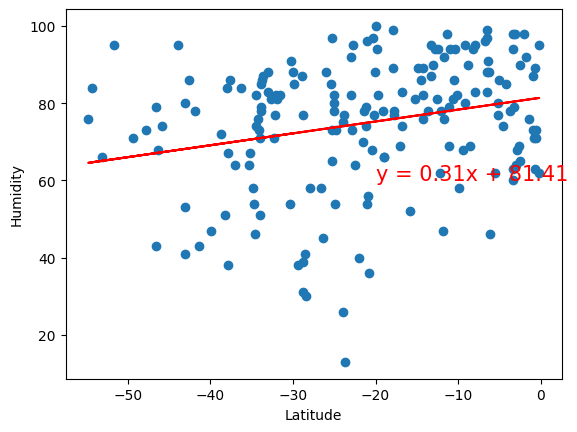

In [31]:
# Define a function to create Linear Regression plots
x_values3 = southern_hemi_df["Lat"]
y_values3 = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values3, y_values3)
regress_values3 = x_values3 * slope + intercept
line_eq3 = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
# Southern Hemisphere
plt.scatter(x_values3,y_values3)
plt.plot(x_values3,regress_values3, "-r")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq3,(-20,60),fontsize=15,color="red")
print(f'The r-value is {rvalue}')
plt.show()

**Discussion about the linear relationship:** 
---
 - There is a slightly positive correlation between latitude and humidity on the Northern Hemisphere.
 - There is a slightly positive correlation between latitude and humidity on the Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.18488016245328903


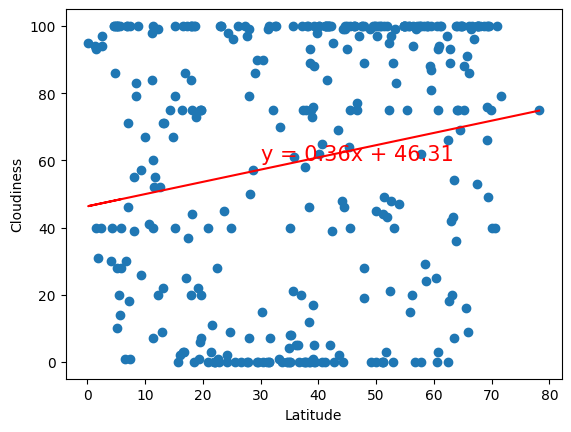

In [33]:
# Define a function to create Linear Regression plots
x_values4 = northern_hemi_df["Lat"]
y_values4 = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values4, y_values4)
regress_values4 = x_values4 * slope + intercept
line_eq4 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Northern Hemisphere
plt.scatter(x_values4,y_values4)
plt.plot(x_values4,regress_values4, "-r")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq4,(30,60),fontsize=15,color="red")
print(f'The r-value is {rvalue}')
plt.show()

The r-value is 0.1901145507520413


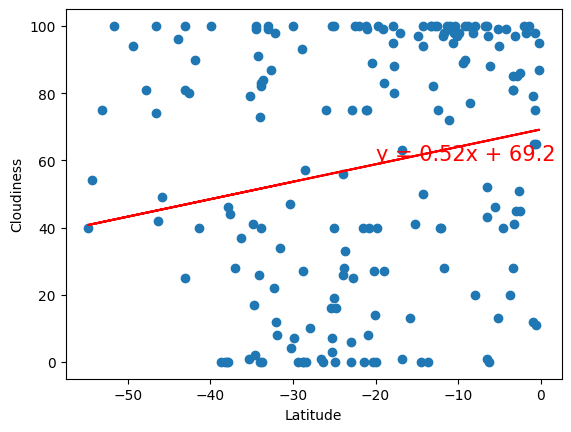

In [34]:
# Define a function to create Linear Regression plots
x_values5 = southern_hemi_df["Lat"]
y_values5 = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values5, y_values5)
regress_values5 = x_values5 * slope + intercept
line_eq5 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Southern Hemisphere
plt.scatter(x_values5,y_values5)
plt.plot(x_values5,regress_values5, "-r")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq5,(-20,60),fontsize=15,color="red")
print(f'The r-value is {rvalue}')
plt.show()

**Discussion about the linear relationship:** 
---
 - There is no correlation between latitude and cloudiness on the Northern Hemisphere.
 - There is no correlation between latitude and cloudiness on the Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.13203971035840079


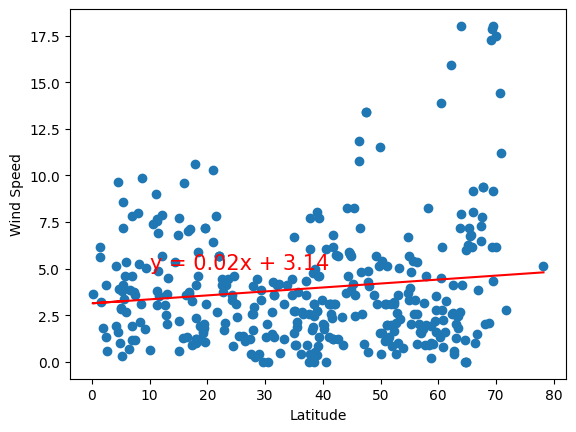

In [37]:
# Define a function to create Linear Regression plots
x_values6 = northern_hemi_df["Lat"]
y_values6 = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values6, y_values6)
regress_values6 = x_values6 * slope + intercept
line_eq6 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Northern Hemisphere
plt.scatter(x_values6,y_values6)
plt.plot(x_values6,regress_values6, "-r")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq6,(10,5),fontsize=15,color="red")
print(f'The r-value is {rvalue}')
plt.show()

The r-value is -0.2102179957308865


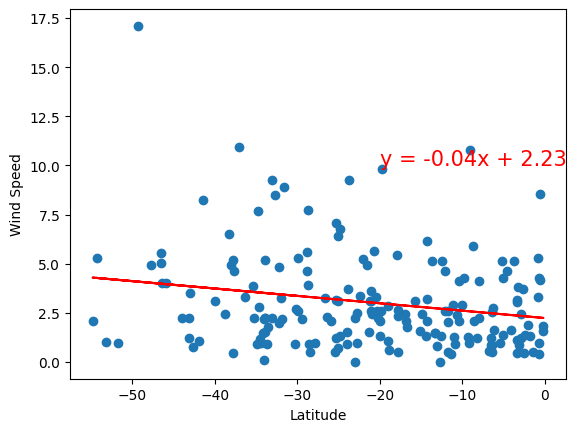

In [38]:
# Define a function to create Linear Regression plots
x_values7 = southern_hemi_df["Lat"]
y_values7 = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values7, y_values7)
regress_values7 = x_values7 * slope + intercept
line_eq7 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Southern Hemisphere
plt.scatter(x_values7,y_values7)
plt.plot(x_values7,regress_values7, "-r")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq7,(-20,10),fontsize=15,color="red")
print(f'The r-value is {rvalue}')
plt.show()

**Discussion about the linear relationship:** 
---
 - There is no correlation between latitude and wind speed on the Northern Hemisphere.
 - There is no correlation between latitude and wind speed on the Southern Hemisphere.